In [35]:
import numpy as np
import tqdm
from matplotlib import pyplot as plt

# Settings

In [36]:
ns = [2 ** i for i in range(4, 8)]

f = lambda x: -4 * np.cos(2*x)
u = lambda x: np.cos(2*x)


x_0 = 0
x_final = np.pi
u_0 = u(x_0)



def make_A_forward_bc(n):
    A = np.eye(n) * -2 + np.eye(n, k=1) + np.eye(n, k=-1)
    A[-1, -1] = -1
    return A

def make_A_central_bc(n):
    A = np.eye(n) * -2 + np.eye(n, k=1) + np.eye(n, k=-1)
    A[-1, -2] = 2
    return A
    
    

def make_b(f, u_0, points, h):
    b = np.vectorize(f)(points) * (h ** 2)
    b[0] -= u_0
    return b

# Running

In [37]:
def get_results(make_A):
    results = {}
    for n in tqdm.tqdm(ns):
        points = np.linspace(0, x_final, n+1)[1:]
        h = x_final / n
        
        A = make_A(n)
        b = make_b(f, u_0, points, h)
        
        results[n] = np.linalg.solve(A, b)
    return results

# Approximation Plots

In [38]:
def plots(results, name_extender):
    # approximation plot
    for n, approxs in results.items():
        points = np.linspace(0, x_final, n+1)[1:]
        plt.plot(points, approxs, label=f'sampled for n={n}')
    
    real_vals = np.vectorize(u)(points)
    plt.plot(points, real_vals, label=f'real for n={n}')

    plt.legend()
    plt.savefig(f'{name_extender}_numerical_approx.png')
    
    # error plot
    plt.clf()
    for n, approxs in results.items():
        points = np.linspace(0, x_final, n+1)[1:]
        real_vals = np.vectorize(u)(points)
        errors = np.abs(real_vals - approxs)
        plt.plot(points, errors, label=f'errors for n={n}')
    
    plt.yscale("log")
    plt.legend()
    plt.savefig(f'{name_extender}_errors.png')

100%|██████████| 4/4 [00:00<00:00, 707.36it/s]


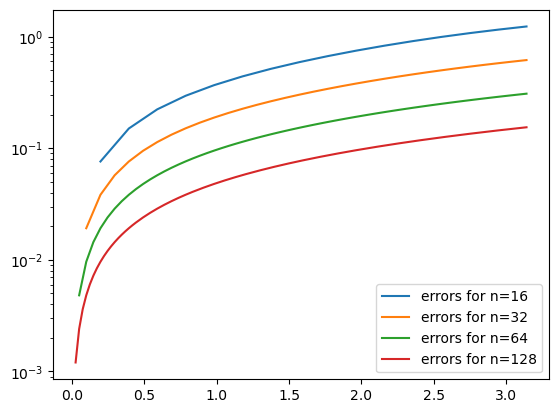

In [39]:
forward_results = get_results(make_A_forward_bc)
plots(forward_results, 'forward')

100%|██████████| 4/4 [00:00<00:00, 1179.42it/s]


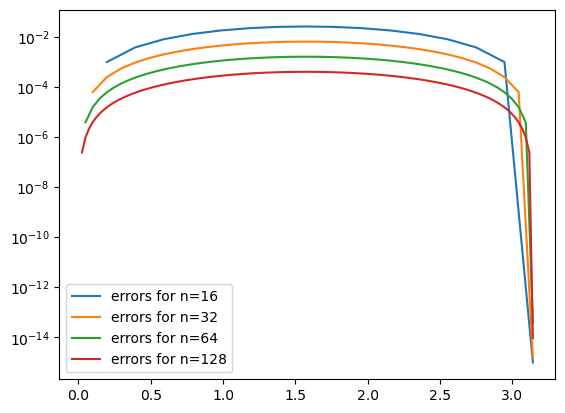

In [40]:
central_results = get_results(make_A_central_bc)
plots(central_results, 'central')